<a href="https://colab.research.google.com/github/suni21/cv_projects/blob/main/water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [7]:
!wget https://raw.githubusercontent.com/suni21/cv_projects/main/aroura.jpg


--2021-06-19 09:02:51--  https://raw.githubusercontent.com/suni21/cv_projects/main/aroura.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20461 (20K) [image/jpeg]
Saving to: ‘aroura.jpg’

aroura.jpg          100%[===================>]  19.98K  --.-KB/s    in 0s      

2021-06-19 09:02:52 (52.8 MB/s) - ‘aroura.jpg’ saved [20461/20461]



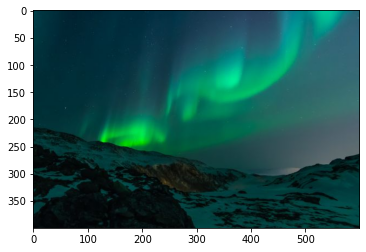

In [28]:
bg = cv2.imread("aroura.jpg")
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.imshow(bg)

In [48]:
!wget https://raw.githubusercontent.com/suni21/cv_projects/main/logoo.png

--2021-06-19 09:24:36--  https://raw.githubusercontent.com/suni21/cv_projects/main/logoo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6539 (6.4K) [image/png]
Saving to: ‘logoo.png’

logoo.png           100%[===================>]   6.39K  --.-KB/s    in 0s      

2021-06-19 09:24:36 (77.7 MB/s) - ‘logoo.png’ saved [6539/6539]



In [49]:
watermark = cv2.imread("logoo.png", -1)
wh, ww, wc = watermark.shape

print(watermark.shape)

(55, 114, 4)


(400, 600, 4)


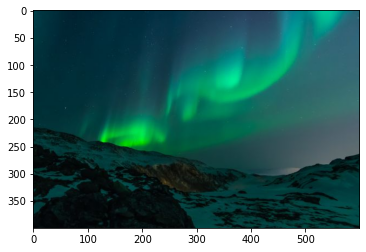

In [50]:
(h, w, c) = bg.shape
image = np.dstack([bg, np.full((h, w), 255)])
print(image.shape)
plt.imshow(image)

In [52]:
x1, y1 = 20, 20
x2, y2 = x1 + ww, y1 + wh

overlay = np.zeros_like(image)
overlay[y1:y2, x1:x2] = watermark

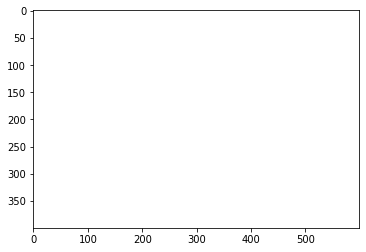

In [44]:
plt.imshow(overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


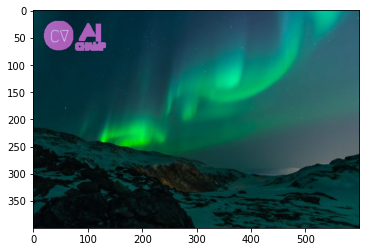

In [53]:
combined = image.copy()
combined = cv2.addWeighted(overlay, 0.9, combined, 1.0, 0.0)

plt.imsave("wtt.png", combined.astype("uint8"))
plt.imshow(combined)